In [1]:
import pandas as pd
import numpy as np
import pandas_profiling

In [2]:
df=pd.read_csv("gg9.csv",header=None,delimiter=';',
              names=["Index","Structure_Name","Vertices","Order","State_Space_Orbits","Description","Vertex_Orbits"],
              dtype={"Vertices":np.int64,"Order":np.int64,"State_Space_Orbits":np.int64},
              converters={"Vertex_Orbits": lambda x: list(map(np.int64,x.strip('[]').split(',')))})

df=df.drop('Index',axis=1)

In [3]:
df

,Structure_Name,Vertices,Order,State_Space_Orbits,Description,Vertex_Orbits
0,H??????,9,362880,10,S9,[9]
1,H????A?,9,10080,24,C2 x S7,"[2, 7]"
2,H????B?,9,1440,42,C2 x S6,"[2, 6, 1]"
3,H????B_,9,720,48,S5 x S3,"[3, 5, 1]"
4,H????Bo,9,576,50,S4 x S4,"[4, 4, 1]"
...,...,...,...,...,...,...
274663,H]~v~z~,9,384,30,((((C2 x C2 x C2 x C2) : C2) : C2) : C3) : C2,"[8, 1]"
274664,H]~v~~~,9,288,40,C2 x S3 x S4,"[6, 3]"
274665,H]~~~~~,9,960,36,S5 x D8,"[4, 5]"
274666,H^~~~~~,9,10080,24,C2 x S7,"[2, 7]"


In [4]:
df.iloc[10]

Structure_Name             H???C@_
Vertices                         9
Order                           96
State_Space_Orbits              90
Description           C2 x C2 x S4
Vertex_Orbits         [2, 2, 4, 1]
Name: 10, dtype: object

In [5]:
print(df.Description.unique())
len(df.Description.unique())

['S9' 'C2 x S7' 'C2 x S6' 'S5 x S3' 'S4 x S4' 'S3 x S5' 'S7' 'S8'
 'S5 x D8' 'C2 x C2 x S4' 'C2 x S3 x S3' 'C2 x S5' 'S3 x S6' 'C2 x S4'
 'S3 x S3' 'S5' 'S6' 'D8 x S3' 'C2 x C2 x S3' 'D12' 'S4' 'D8 x S5'
 'C2 x C2 x S5' '(S3 x S3) : C2' 'S4 x S3' 'C2 x D8' 'C2 x C2 x C2'
 'C2 x S4 x S3' 'C2 x S3 x S4' 'S3 x S4' 'C2 x C2 x D8' 'S4 x D8'
 'C2 x C2 x C2 x C2' 'C2 x C2' 'C2 x D8 x S3' 'C2 x C2 x C2 x S3' 'S3'
 'C2' 'S4 x S5' 'S4 x D10' 'D8' '1' 'D8 x S4' '((S3 x S3) : C2) x S3'
 'S3 x S3 x S3' '((((C2 x C2 x C2 x C2) : C2) : C2) : C3) : C2'
 'C2 x S3 x D8' 'D8 x D8' 'C2 x C2 x D10' 'C2 x ((S3 x S3) : C2)'
 'S5 x S4' 'D20' 'S3 x D10' 'D28' '(C2 x C2 x C2 x C2) : C2' 'D16'
 '(((C2 x C2 x C2 x C2) : C2) : C2) : C2' '(S4 x S4) : C2' 'D8 x D10'
 'D10' 'S6 x S3' 'D14' 'D18' 'D10 x S4'
 '((((C3 x C3 x C3) : (C2 x C2)) : C3) : C2) : C2' 'C3'
 'S3 x ((S3 x S3) : C2)']


67

In [6]:
df.isna().sum()

Structure_Name        0
Vertices              0
Order                 0
State_Space_Orbits    0
Description           0
Vertex_Orbits         0
dtype: int64

Text(0, 0.5, 'Value Counts')

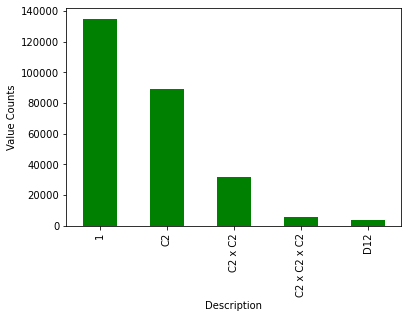

In [7]:
%matplotlib inline
bx=df['Description'].value_counts().head(5).plot(kind='bar',color='green')
bx.set_xlabel("Description")
bx.set_ylabel("Value Counts")

Text(0, 0.5, 'Value Counts')

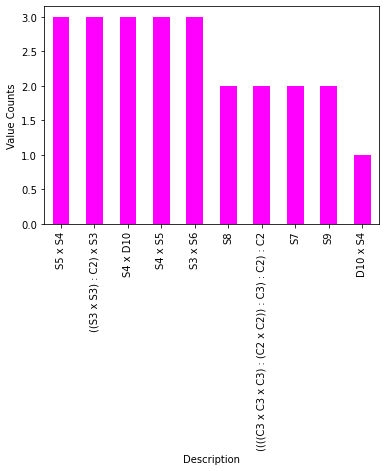

In [8]:
bx=df['Description'].value_counts().tail(10).plot(kind='bar', color='magenta')
bx.set_xlabel("Description")
bx.set_ylabel("Value Counts")

Text(0, 0.5, 'Value Counts')

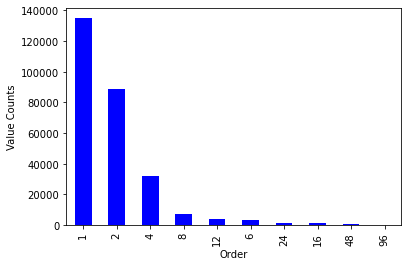

In [9]:
cx=df['Order'].value_counts().head(10).plot(kind='bar', color='blue')
cx.set_xlabel("Order")
cx.set_ylabel("Value Counts")

Text(0, 0.5, 'Value Counts')

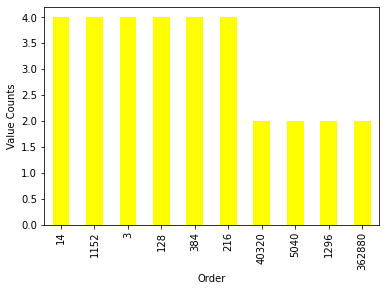

In [10]:
dx=df['Order'].value_counts().tail(10).plot(kind='bar', color='yellow')
dx.set_xlabel("Order")
dx.set_ylabel("Value Counts")

<AxesSubplot:>

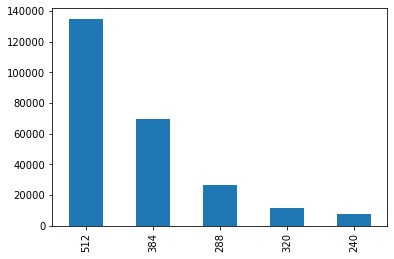

In [11]:
df['State_Space_Orbits'].value_counts().head(5).plot(kind='bar')

<AxesSubplot:>

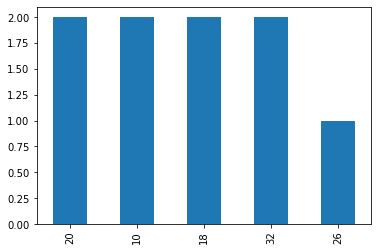

In [12]:
df['State_Space_Orbits'].value_counts().tail(5).plot(kind='bar')

<AxesSubplot:>

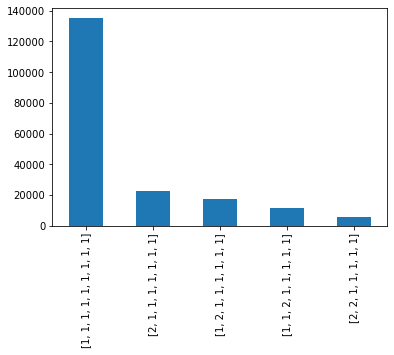

In [13]:
df['Vertex_Orbits'].value_counts().head(5).plot(kind='bar')

<AxesSubplot:>

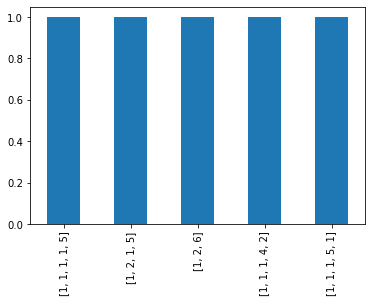

In [14]:
df['Vertex_Orbits'].value_counts().tail(5).plot(kind='bar')

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'symmetries (log)')

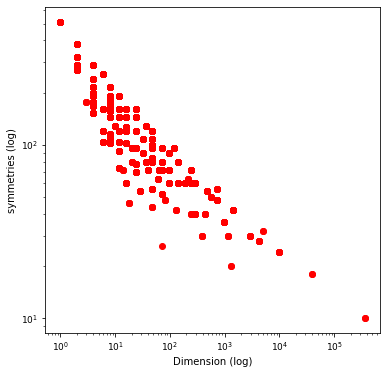

In [16]:
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
ax.scatter(data=df,x='Order',y='State_Space_Orbits',color='Red')
#plt.xlim([0,10000])
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Dimension (log)')
ax.set_ylabel('symmetries (log)')
# plt.show()

In [17]:

import matplotlib.pyplot as plt

In [18]:
import networkx as nx
g1 = nx.read_graph6 ("graph9.g6")
g1

 ...]

In [19]:
edge=[]
for i in g1:
    edge.append(i.edges())

In [20]:
g1[10].edges()

EdgeView([(0, 7), (1, 8), (2, 8)])

In [21]:
edge[1]

EdgeView([(0, 8)])

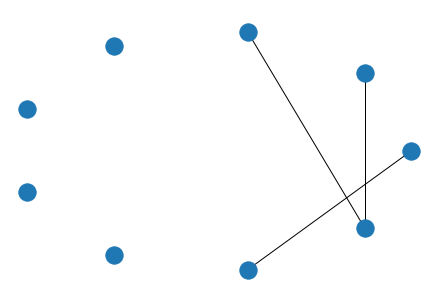

In [22]:
nx.draw_circular(g1[10])
plt.show()

In [23]:
g1[1].edges()

EdgeView([(0, 8)])

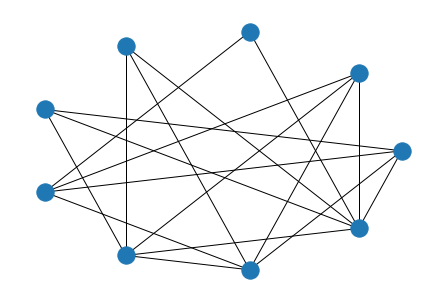

In [24]:
nx.draw_circular(g1[100000])
plt.show()

In [25]:
df['Vertex_Orbits_Length']=df.Vertex_Orbits.map(len)
df['Vertex_Orbits_Max']=df.Vertex_Orbits.map(max)

In [26]:
df

,Structure_Name,Vertices,Order,State_Space_Orbits,Description,Vertex_Orbits,Vertex_Orbits_Length,Vertex_Orbits_Max
0,H??????,9,362880,10,S9,[9],1,9
1,H????A?,9,10080,24,C2 x S7,"[2, 7]",2,7
2,H????B?,9,1440,42,C2 x S6,"[2, 6, 1]",3,6
3,H????B_,9,720,48,S5 x S3,"[3, 5, 1]",3,5
4,H????Bo,9,576,50,S4 x S4,"[4, 4, 1]",3,4
...,...,...,...,...,...,...,...,...
274663,H]~v~z~,9,384,30,((((C2 x C2 x C2 x C2) : C2) : C2) : C3) : C2,"[8, 1]",2,8
274664,H]~v~~~,9,288,40,C2 x S3 x S4,"[6, 3]",2,6
274665,H]~~~~~,9,960,36,S5 x D8,"[4, 5]",2,5
274666,H^~~~~~,9,10080,24,C2 x S7,"[2, 7]",2,7


Text(0, 0.5, 'State Space Orbits')

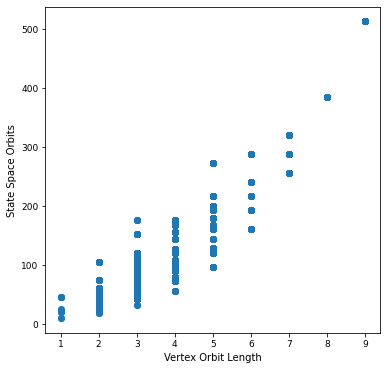

In [47]:
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
ax.scatter(data=df,x='Vertex_Orbits_Length',y='State_Space_Orbits')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Vertex Orbit Length')
ax.set_ylabel('State Space Orbits')
#plt.xlim([0,10000])
# plt.show()

In [28]:
df['Vertex_Orbits_Max']=df.Vertex_Orbits.map(max)

Text(0, 0.5, 'State Space Orbits')

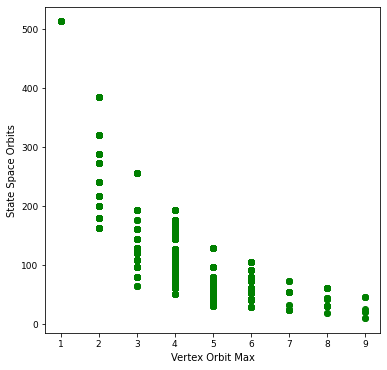

In [49]:
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
ax.scatter(data=df,x='Vertex_Orbits_Max',y='State_Space_Orbits', color='Green')
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlabel('Vertex Orbit Max')
ax.set_ylabel('State Space Orbits')

In [30]:
df

,Structure_Name,Vertices,Order,State_Space_Orbits,Description,Vertex_Orbits,Vertex_Orbits_Length,Vertex_Orbits_Max
0,H??????,9,362880,10,S9,[9],1,9
1,H????A?,9,10080,24,C2 x S7,"[2, 7]",2,7
2,H????B?,9,1440,42,C2 x S6,"[2, 6, 1]",3,6
3,H????B_,9,720,48,S5 x S3,"[3, 5, 1]",3,5
4,H????Bo,9,576,50,S4 x S4,"[4, 4, 1]",3,4
...,...,...,...,...,...,...,...,...
274663,H]~v~z~,9,384,30,((((C2 x C2 x C2 x C2) : C2) : C2) : C3) : C2,"[8, 1]",2,8
274664,H]~v~~~,9,288,40,C2 x S3 x S4,"[6, 3]",2,6
274665,H]~~~~~,9,960,36,S5 x D8,"[4, 5]",2,5
274666,H^~~~~~,9,10080,24,C2 x S7,"[2, 7]",2,7


In [31]:
df['Assymmetry']=df['Vertex_Orbits_Length']==9

In [32]:
df

,Structure_Name,Vertices,Order,State_Space_Orbits,Description,Vertex_Orbits,Vertex_Orbits_Length,Vertex_Orbits_Max,Assymmetry
0,H??????,9,362880,10,S9,[9],1,9,False
1,H????A?,9,10080,24,C2 x S7,"[2, 7]",2,7,False
2,H????B?,9,1440,42,C2 x S6,"[2, 6, 1]",3,6,False
3,H????B_,9,720,48,S5 x S3,"[3, 5, 1]",3,5,False
4,H????Bo,9,576,50,S4 x S4,"[4, 4, 1]",3,4,False
...,...,...,...,...,...,...,...,...,...
274663,H]~v~z~,9,384,30,((((C2 x C2 x C2 x C2) : C2) : C2) : C3) : C2,"[8, 1]",2,8,False
274664,H]~v~~~,9,288,40,C2 x S3 x S4,"[6, 3]",2,6,False
274665,H]~~~~~,9,960,36,S5 x D8,"[4, 5]",2,5,False
274666,H^~~~~~,9,10080,24,C2 x S7,"[2, 7]",2,7,False


In [33]:
len(df[df.Assymmetry == True])

135004

<AxesSubplot:xlabel='Assymmetry'>

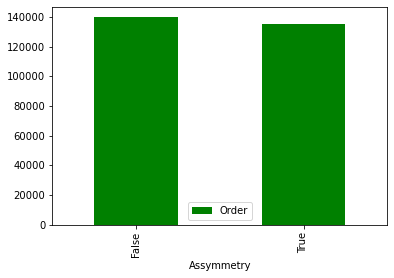

In [34]:
df.groupby('Assymmetry')['Order'].count().plot(kind = 'bar', legend=True, color='Green')

In [35]:
df.head(16)

,Structure_Name,Vertices,Order,State_Space_Orbits,Description,Vertex_Orbits,Vertex_Orbits_Length,Vertex_Orbits_Max,Assymmetry
0,H??????,9,362880,10,S9,[9],1,9,False
1,H????A?,9,10080,24,C2 x S7,"[2, 7]",2,7,False
2,H????B?,9,1440,42,C2 x S6,"[2, 6, 1]",3,6,False
3,H????B_,9,720,48,S5 x S3,"[3, 5, 1]",3,5,False
4,H????Bo,9,576,50,S4 x S4,"[4, 4, 1]",3,4,False
5,H????Bw,9,720,48,S3 x S5,"[5, 3, 1]",3,5,False
6,H????B{,9,1440,42,C2 x S6,"[6, 2, 1]",3,6,False
7,H????B},9,5040,32,S7,"[7, 1, 1]",3,7,False
8,H????B~,9,40320,18,S8,"[8, 1]",2,8,False
9,H???C@?,9,960,36,S5 x D8,"[4, 5]",2,5,False


In [36]:
true=df[df['Assymmetry']==True]

In [37]:
true

,Structure_Name,Vertices,Order,State_Space_Orbits,Description,Vertex_Orbits,Vertex_Orbits_Length,Vertex_Orbits_Max,Assymmetry
595,H??E@ai,9,1,512,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",9,1,True
636,H??E@ei,9,1,512,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",9,1,True
944,H??ED`i,9,1,512,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",9,1,True
945,H??ED`j,9,1,512,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",9,1,True
966,H??EDai,9,1,512,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",9,1,True
...,...,...,...,...,...,...,...,...,...
274531,HUxvvn},9,1,512,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",9,1,True
274613,HUzvvnn,9,1,512,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",9,1,True
274615,HUzvvn~,9,1,512,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",9,1,True
274617,HUzvvzv,9,1,512,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1]",9,1,True


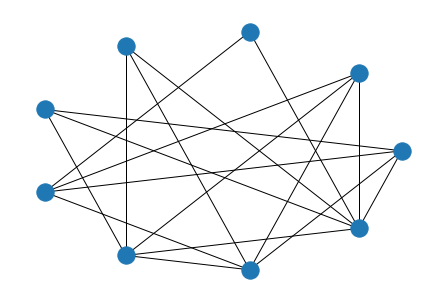

In [38]:
nx.draw_circular(g1[100000])
plt.show()

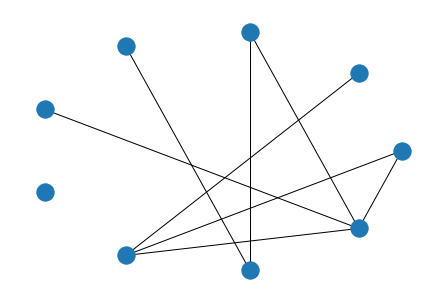

In [39]:
nx.draw_circular(g1[595])

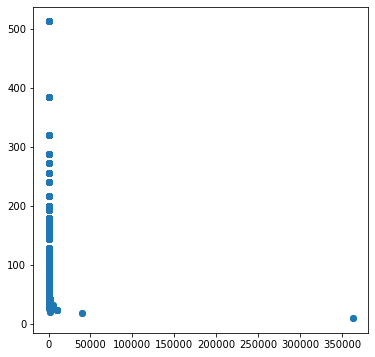

In [40]:
fig=plt.figure(figsize=(6,6))
ax=plt.gca()
ax.scatter(data=df,x='Order',y='State_Space_Orbits')

In [41]:
true.Order.unique()

array([1], dtype=int64)

In [42]:
true.State_Space_Orbits.unique()

array([512], dtype=int64)

In [43]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
df[df['Description']=='D28']

,Structure_Name,Vertices,Order,State_Space_Orbits,Description,Vertex_Orbits,Vertex_Orbits_Length,Vertex_Orbits_Max,Assymmetry
7134,H?AEB?c,9,28,54,D28,"[7, 2]",2,7,False
31008,H?`D@_W,9,28,54,D28,"[7, 2]",2,7,False
88948,H?bEUXM,9,28,54,D28,"[7, 2]",2,7,False
175446,HCQddgu,9,28,54,D28,"[7, 2]",2,7,False
235339,HCp`f~},9,28,54,D28,"[7, 2]",2,7,False
235340,HCp`f~~,9,28,54,D28,"[7, 2]",2,7,False
274596,HUzrv~},9,28,54,D28,"[7, 2]",2,7,False
274597,HUzrv~~,9,28,54,D28,"[7, 2]",2,7,False


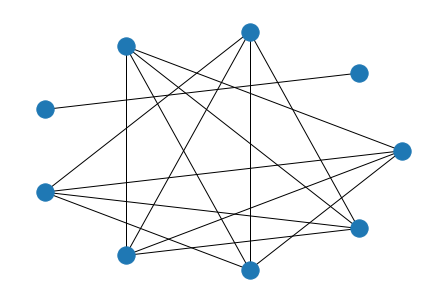

In [45]:
nx.draw_circular(g1[175446])

In [46]:
nx.draw

<function networkx.drawing.nx_pylab.draw(G, pos=None, ax=None, **kwds)>